In [1]:
from sklearn import metrics

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

from statsmodels.stats.proportion import proportions_ztest

from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler,MinMaxScaler
mms=MinMaxScaler()
sc=StandardScaler()

from sklearn.model_selection import GridSearchCV

import scikitplot as skplt

from imblearn.over_sampling import RandomOverSampler

from xgboost import XGBClassifier

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import KFold

from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, classification_report

In [2]:
from sklearn.model_selection import RandomizedSearchCV

In [3]:
bank=pd.read_csv('bank-full.csv',delimiter=';')

bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
from statsmodels.stats.anova import anova_lm
from statsmodels.api import OLS

In [5]:
main_df=bank.copy(deep=True)

###### Reducing Skewness of the age

###### Reducing skewness of the balance

In [6]:
main_df['balance'].skew()

8.360308326166326

In [7]:
np.cbrt(main_df['balance']).skew()

-0.07818749236478738

In [8]:
main_df['balance']=np.cbrt(main_df['balance'])

###### Reducing skewness of the duration

In [9]:
main_df['duration'].skew()

3.144318099423456

In [10]:
np.cbrt(main_df['duration']).skew()

0.64014649967056

In [11]:
main_df[main_df['duration']==0]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
6424,53,management,married,primary,no,7.054004,yes,no,unknown,27,may,0,4,-1,0,unknown,no
22937,35,technician,married,secondary,no,17.689106,no,no,cellular,26,aug,0,15,-1,0,unknown,no
36425,31,entrepreneur,married,secondary,no,5.451362,yes,yes,cellular,11,may,0,2,-1,0,unknown,no


In [12]:
main_df['duration']=np.cbrt(main_df['duration'])

In [13]:
#Due to high Correlation dropping Duration
main_df.drop('duration',axis=1,inplace=True)

In [14]:
main_df['y']=main_df['y'].replace(['no','yes'],[0, 1])

In [15]:
cat_cols = main_df.select_dtypes(include=[
        'object']).columns
df = pd.get_dummies(main_df, columns=cat_cols,drop_first=True)

#standard Scaler for Numerical Variables
scaler = StandardScaler()
num_cols = main_df.select_dtypes(include=np.number).columns
num_cols = num_cols.drop('y')
df[num_cols] = scaler.fit_transform(df[num_cols])

In [16]:
X1 = df.drop(columns=['y'])


y1 =main_df['y']
print(X1.shape)
print(y1.shape)

y1.value_counts().to_frame()

(45211, 41)
(45211,)


,y
0,39922
1,5289


In [17]:
sampler = RandomOverSampler(random_state=42)

X, y = sampler.fit_resample(X1, y1)
pd.Series(y).value_counts()

0    39922
1    39922
Name: y, dtype: int64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### XGBoost Classifier

In [19]:
xgb = XGBClassifier(use_label_encoder=False)
model = XGBClassifier(use_label_encoder=False)


[15:16:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
CLASSIFICATION REFORT
              precision    recall  f1-score   support

           0       0.79      0.86      0.82      7908
           1       0.85      0.78      0.81      8061

    accuracy                           0.82     15969
   macro avg       0.82      0.82      0.82     15969
weighted avg       0.82      0.82      0.82     15969

CONFUSION MATRIX
Roc Auc Score  0.9005306073184883


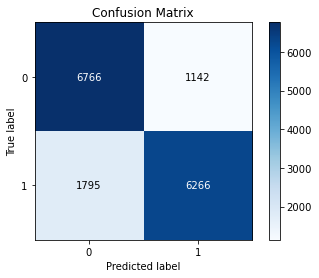

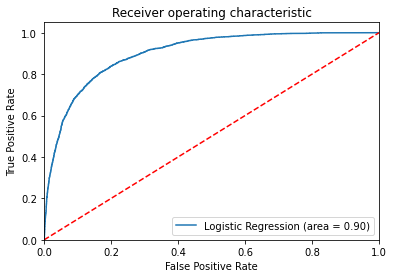

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
model.fit(X_train,y_train)
    
y_test_model_predict=model.predict(X_test)
    
print('CLASSIFICATION REFORT')
print(classification_report(y_test, y_test_model_predict))

print('CONFUSION MATRIX')
skplt.metrics.plot_confusion_matrix(y_test,y_test_model_predict)


model_roc_auc = roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

print('Roc Auc Score ',model_roc_auc)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % model_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

#### crossvalScore XGB

In [105]:
xgb = XGBClassifier(use_label_encoder=False)
cs=cross_val_score(xgb,X_train,y_train,cv=10)

[17:45:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:45:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:45:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:45:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [106]:
from sklearn.model_selection import cross_val_predict
cvp_predict=cross_val_predict(xgb,X_train,y_train,cv=10)

[17:46:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:46:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:46:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:46:27] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

In [107]:
cvp=cross_val_predict(xgb,X_train,y_train,cv=10,method='predict_proba')

[17:47:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:47:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:47:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[17:47:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

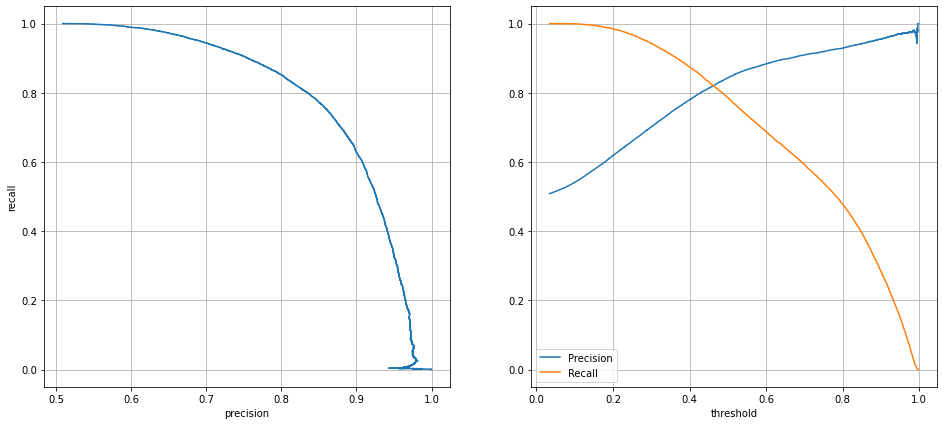

In [134]:
xgb_precision,xgb_recall,xgb_thresh=metrics.precision_recall_curve(y_train,cvp[:,-1])

plt.figure(figsize=(16,7))
plt.subplot(1,2,1)
plt.plot(xgb_precision,xgb_recall)
plt.ylabel('recall')
plt.xlabel('precision')
plt.grid()

plt.subplot(1,2,2)
plt.plot(xgb_thresh,xgb_precision[:-1],label='Precision')
plt.plot(xgb_thresh,xgb_recall[:-1],label='Recall')
plt.xlabel('threshold')
plt.legend()
plt.grid()

Cross validation scores are  [0.82686287 0.80510332 0.82451472 0.82263619 0.81715717 0.81462345
 0.82573978 0.81728511 0.82229529 0.82777517] 

              precision    recall  f1-score   support

           0       0.80      0.85      0.83     32014
           1       0.84      0.79      0.81     31861

    accuracy                           0.82     63875
   macro avg       0.82      0.82      0.82     63875
weighted avg       0.82      0.82      0.82     63875

0.9010471724880368


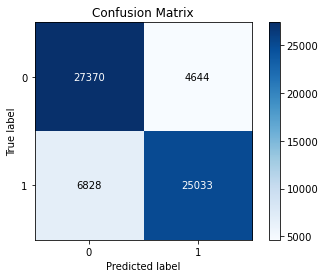

In [110]:
print('Cross validation scores are ',cs,'\n')
print(classification_report(y_train, cvp_predict))

logit_roc_auc = roc_auc_score(y_train, cvp[:,1])
print(logit_roc_auc)

skplt.metrics.plot_confusion_matrix(y_train,cvp_predict)

#### CROSS VALIDATION USING KFOLD=5

In [20]:
def classifier(model, X, y):


    kf = KFold(n_splits = 5, shuffle = True, random_state = 10)

    scores = []
    
    
    for train_index,test_index in kf.split(X,y):
        X_train,X_test = X.loc[train_index],X.loc[test_index]
        y_train,y_test = y.loc[train_index],y.loc[test_index]

        # Fit the model on the training data
        model_obj = model.fit(X_train, y_train)
        y_pred = model_obj.predict(X_test)
        # Score the model on the test/validation data
        score = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        conf_matrix = confusion_matrix(y_test, y_pred)
        
        scores.append(score)
        mean_score = np.array(scores).mean()
        

    print('Accuracy scores of the model: {:.2f}'.format(mean_score))
    print('\n Classification report of the model')
    print(report)
    print('SCORES',scores)
    print('\n Confusion Matrix of the model')
    print(conf_matrix)

### XGBClassifier

In [121]:
xgb = XGBClassifier(use_label_encoder=False)

classifier(xgb, X, y)

[18:36:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:36:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:36:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[18:36:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_rel

AttributeError: 'list' object has no attribute 'mean'

In [21]:
kf = KFold(n_splits = 5, shuffle = True, random_state = 4)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [22]:
X_train.shape

(63875, 41)

## TUNING

In [43]:
params = {'n_estimators':[300,450,600],
    'gamma': [0.5, 1, 1.5, 2, 5],
        'max_depth': [4, 5,6,7],
          'learning_rate':[0.1,0.01,0.02,,0.2,0.5]
        }

xgb_hyp = XGBClassifier( objective='binary:logistic',
                    use_label_encoder=False,booster='gbtree')

xgb_grid_search = GridSearchCV(xgb_hyp, param_grid=params,cv=5, verbose=3)

xgb_grid_search.fit(X_train, y_train)

xgb_grid_search.best_params_

Fitting 5 folds for each of 180 candidates, totalling 900 fits
[22:44:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=0.5, learning_rate=0.1, max_depth=4, n_estimators=300; total time=  19.5s
[22:44:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=0.5, learning_rate=0.1, max_depth=4, n_estimators=300; total time=  24.5s
[22:44:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, th

[CV 1/5] END gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=450; total time=  43.4s
[22:54:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=450; total time=  34.5s
[22:54:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=0.5, learning_rate=0.1, max_depth=5, n_estimators=450; total time=  32.7s
[22:55:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061:

[CV 2/5] END gamma=0.5, learning_rate=0.1, max_depth=6, n_estimators=600; total time=  42.8s
[23:06:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=0.5, learning_rate=0.1, max_depth=6, n_estimators=600; total time=  39.8s
[23:06:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=0.5, learning_rate=0.1, max_depth=6, n_estimators=600; total time=  39.9s
[23:07:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061:

[CV 3/5] END gamma=0.5, learning_rate=0.01, max_depth=4, n_estimators=300; total time=  16.6s
[23:18:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=0.5, learning_rate=0.01, max_depth=4, n_estimators=300; total time=  14.6s
[23:18:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=0.5, learning_rate=0.01, max_depth=4, n_estimators=300; total time=  14.1s
[23:18:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:10

[CV 4/5] END gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=450; total time=  28.6s
[23:26:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=450; total time=  27.1s
[23:26:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=600; total time=  41.1s
[23:27:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:10

[CV 5/5] END gamma=0.5, learning_rate=0.01, max_depth=6, n_estimators=600; total time=  45.9s
[23:38:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=300; total time=  25.9s
[23:39:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=300; total time=  26.9s
[23:39:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:10

[CV 1/5] END gamma=0.5, learning_rate=0.02, max_depth=5, n_estimators=600; total time=  29.8s
[00:06:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=0.5, learning_rate=0.02, max_depth=5, n_estimators=600; total time=  30.7s
[00:07:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=0.5, learning_rate=0.02, max_depth=5, n_estimators=600; total time=  30.2s
[00:07:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:10

[CV 2/5] END gamma=0.5, learning_rate=0.02, max_depth=7, n_estimators=300; total time=  20.9s
[00:16:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=0.5, learning_rate=0.02, max_depth=7, n_estimators=300; total time=  20.5s
[00:16:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=0.5, learning_rate=0.02, max_depth=7, n_estimators=300; total time=  20.5s
[00:16:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:10

[CV 3/5] END gamma=1, learning_rate=0.1, max_depth=4, n_estimators=450; total time=  22.8s
[00:26:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=1, learning_rate=0.1, max_depth=4, n_estimators=450; total time=  20.1s
[00:26:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=1, learning_rate=0.1, max_depth=4, n_estimators=450; total time=  20.8s
[00:26:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Start

[CV 4/5] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=600; total time=  28.5s
[00:34:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=1, learning_rate=0.1, max_depth=5, n_estimators=600; total time=  27.2s
[00:34:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=1, learning_rate=0.1, max_depth=6, n_estimators=300; total time=  16.5s
[00:35:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Start

[CV 5/5] END gamma=1, learning_rate=0.01, max_depth=4, n_estimators=450; total time=  19.1s
[00:51:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=1, learning_rate=0.01, max_depth=4, n_estimators=600; total time=  24.4s
[00:51:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=1, learning_rate=0.01, max_depth=4, n_estimators=600; total time=  24.9s
[00:51:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 1/5] END gamma=1, learning_rate=0.01, max_depth=6, n_estimators=300; total time=  16.9s
[00:59:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=1, learning_rate=0.01, max_depth=6, n_estimators=300; total time=  16.8s
[00:59:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=1, learning_rate=0.01, max_depth=6, n_estimators=300; total time=  17.0s
[00:59:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 2/5] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=450; total time=  32.9s
[01:08:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=450; total time=  34.1s
[01:08:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=1, learning_rate=0.01, max_depth=7, n_estimators=450; total time=  37.8s
[01:09:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 3/5] END gamma=1, learning_rate=0.02, max_depth=4, n_estimators=600; total time=  26.0s
[01:18:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=1, learning_rate=0.02, max_depth=4, n_estimators=600; total time=  24.2s
[01:18:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=1, learning_rate=0.02, max_depth=4, n_estimators=600; total time=  24.9s
[01:19:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 4/5] END gamma=1, learning_rate=0.02, max_depth=6, n_estimators=300; total time=  17.1s
[01:27:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=1, learning_rate=0.02, max_depth=6, n_estimators=300; total time=  20.9s
[01:27:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=1, learning_rate=0.02, max_depth=6, n_estimators=450; total time=  29.6s
[01:28:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 5/5] END gamma=1, learning_rate=0.02, max_depth=7, n_estimators=450; total time= 1.1min
[01:45:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=1, learning_rate=0.02, max_depth=7, n_estimators=600; total time= 1.4min
[01:46:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=1, learning_rate=0.02, max_depth=7, n_estimators=600; total time= 1.5min
[01:48:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 1/5] END gamma=1.5, learning_rate=0.1, max_depth=6, n_estimators=450; total time=  30.5s
[07:35:34] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=1.5, learning_rate=0.1, max_depth=6, n_estimators=450; total time=  36.1s
[07:36:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=1.5, learning_rate=0.1, max_depth=6, n_estimators=450; total time=  47.7s
[07:36:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061:

[CV 2/5] END gamma=1.5, learning_rate=0.1, max_depth=7, n_estimators=600; total time= 1.0min
[07:51:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=1.5, learning_rate=0.1, max_depth=7, n_estimators=600; total time=  59.0s
[07:52:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=1.5, learning_rate=0.1, max_depth=7, n_estimators=600; total time= 1.0min
[07:53:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061:

[CV 3/5] END gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=300; total time=  22.3s
[08:02:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=300; total time=  22.6s
[08:02:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=1.5, learning_rate=0.01, max_depth=5, n_estimators=300; total time=  23.1s
[08:03:22] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:10

[CV 4/5] END gamma=1.5, learning_rate=0.01, max_depth=7, n_estimators=600; total time=  42.2s
[08:28:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=1.5, learning_rate=0.01, max_depth=7, n_estimators=600; total time=  42.4s
[08:28:50] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=1.5, learning_rate=0.02, max_depth=4, n_estimators=300; total time=  11.5s
[08:29:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:10

[CV 5/5] END gamma=1.5, learning_rate=0.02, max_depth=6, n_estimators=450; total time=  25.7s
[08:42:09] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=1.5, learning_rate=0.02, max_depth=6, n_estimators=600; total time=  33.9s
[08:42:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=1.5, learning_rate=0.02, max_depth=6, n_estimators=600; total time=  34.1s
[08:43:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:10

[CV 1/5] END gamma=2, learning_rate=0.1, max_depth=4, n_estimators=300; total time=  11.4s
[08:52:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=2, learning_rate=0.1, max_depth=4, n_estimators=300; total time=  11.5s
[08:52:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=2, learning_rate=0.1, max_depth=4, n_estimators=300; total time=  11.4s
[08:53:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Start

[CV 2/5] END gamma=2, learning_rate=0.1, max_depth=5, n_estimators=450; total time=  17.8s
[10:55:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=2, learning_rate=0.1, max_depth=5, n_estimators=450; total time=  17.5s
[10:56:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=2, learning_rate=0.1, max_depth=5, n_estimators=450; total time=  17.8s
[10:56:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Start

[CV 3/5] END gamma=2, learning_rate=0.1, max_depth=6, n_estimators=600; total time=  27.1s
[11:02:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=2, learning_rate=0.1, max_depth=6, n_estimators=600; total time=  27.3s
[11:03:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=2, learning_rate=0.1, max_depth=6, n_estimators=600; total time=  27.7s
[11:03:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Start

[CV 4/5] END gamma=2, learning_rate=0.01, max_depth=4, n_estimators=300; total time=  15.6s
[11:13:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=2, learning_rate=0.01, max_depth=4, n_estimators=300; total time=  23.4s
[11:14:19] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=2, learning_rate=0.01, max_depth=4, n_estimators=450; total time=  23.7s
[11:14:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 5/5] END gamma=2, learning_rate=0.01, max_depth=5, n_estimators=450; total time=  24.2s
[11:23:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=2, learning_rate=0.01, max_depth=5, n_estimators=600; total time=  36.0s
[11:23:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=2, learning_rate=0.01, max_depth=5, n_estimators=600; total time=  32.5s
[11:24:10] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 1/5] END gamma=2, learning_rate=0.02, max_depth=4, n_estimators=450; total time=  23.2s
[11:46:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=2, learning_rate=0.02, max_depth=4, n_estimators=450; total time=  21.0s
[11:46:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=2, learning_rate=0.02, max_depth=4, n_estimators=450; total time=  22.8s
[11:46:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 2/5] END gamma=2, learning_rate=0.02, max_depth=5, n_estimators=600; total time=  31.6s
[11:54:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=2, learning_rate=0.02, max_depth=5, n_estimators=600; total time=  35.1s
[11:54:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=2, learning_rate=0.02, max_depth=5, n_estimators=600; total time=  32.9s
[11:55:29] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 3/5] END gamma=2, learning_rate=0.02, max_depth=7, n_estimators=300; total time=  22.9s
[12:04:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=2, learning_rate=0.02, max_depth=7, n_estimators=300; total time=  23.5s
[12:04:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=2, learning_rate=0.02, max_depth=7, n_estimators=300; total time=  23.4s
[12:05:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 4/5] END gamma=5, learning_rate=0.1, max_depth=4, n_estimators=450; total time=  27.9s
[12:15:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=5, learning_rate=0.1, max_depth=4, n_estimators=450; total time=  27.6s
[12:15:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=5, learning_rate=0.1, max_depth=4, n_estimators=600; total time=  37.4s
[12:16:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Start

[CV 5/5] END gamma=5, learning_rate=0.1, max_depth=5, n_estimators=600; total time=  24.8s
[12:25:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=5, learning_rate=0.1, max_depth=6, n_estimators=300; total time=  28.4s
[12:25:49] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=5, learning_rate=0.1, max_depth=6, n_estimators=300; total time=  23.4s
[12:26:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Start

[CV 1/5] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=450; total time=  30.6s
[12:34:32] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=450; total time=  28.9s
[12:35:01] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=5, learning_rate=0.1, max_depth=7, n_estimators=450; total time=  29.9s
[12:35:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Start

[CV 2/5] END gamma=5, learning_rate=0.01, max_depth=4, n_estimators=600; total time=  26.1s
[12:43:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=5, learning_rate=0.01, max_depth=4, n_estimators=600; total time=  25.5s
[12:43:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=5, learning_rate=0.01, max_depth=4, n_estimators=600; total time=  24.5s
[12:44:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 3/5] END gamma=5, learning_rate=0.01, max_depth=6, n_estimators=300; total time=  18.1s
[12:52:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 4/5] END gamma=5, learning_rate=0.01, max_depth=6, n_estimators=300; total time=  18.1s
[12:52:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=5, learning_rate=0.01, max_depth=6, n_estimators=300; total time=  16.9s
[12:52:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 4/5] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=450; total time=  32.9s
[13:02:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 5/5] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=450; total time=  35.5s
[13:03:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=5, learning_rate=0.01, max_depth=7, n_estimators=600; total time=  43.1s
[13:04:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 5/5] END gamma=5, learning_rate=0.02, max_depth=4, n_estimators=600; total time=  27.4s
[13:12:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/5] END gamma=5, learning_rate=0.02, max_depth=5, n_estimators=300; total time=  16.5s
[13:12:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=5, learning_rate=0.02, max_depth=5, n_estimators=300; total time=  16.1s
[13:12:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 1/5] END gamma=5, learning_rate=0.02, max_depth=6, n_estimators=450; total time=  28.0s
[13:20:08] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/5] END gamma=5, learning_rate=0.02, max_depth=6, n_estimators=450; total time=  27.9s
[13:20:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/5] END gamma=5, learning_rate=0.02, max_depth=6, n_estimators=450; total time=  27.3s
[13:21:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

{'gamma': 0.5, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 600}

In [24]:
params = {'n_estimators':[450,600,650],
    'gamma': [.25,0.5, 1, 1.5],
        'max_depth': [5,6,7,8],
          'learning_rate':[0.1,0.01,0.02]
        }

xgb_hyp = XGBClassifier( objective='binary:logistic',
                    use_label_encoder=False,booster='gbtree')

xgb_grid_search = GridSearchCV(xgb_hyp, param_grid=params,cv=5, verbose=3)

xgb_grid_search.fit(X_train, y_train)

xgb_grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits
[13:54:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END gamma=0.25, learning_rate=0.1, max_depth=5, n_estimators=450; total time=  24.9s
[13:55:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END gamma=0.25, learning_rate=0.1, max_depth=5, n_estimators=450; total time=  23.3s
[13:55:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, 

[CV 3/3] END gamma=0.25, learning_rate=0.1, max_depth=7, n_estimators=450; total time=  32.2s
[14:06:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END gamma=0.25, learning_rate=0.1, max_depth=7, n_estimators=600; total time=  47.7s
[14:07:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END gamma=0.25, learning_rate=0.1, max_depth=7, n_estimators=600; total time=  40.9s
[14:08:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:10

[CV 3/3] END gamma=0.25, learning_rate=0.01, max_depth=5, n_estimators=600; total time=  41.5s
[14:22:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END gamma=0.25, learning_rate=0.01, max_depth=5, n_estimators=650; total time= 1.5min
[14:23:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END gamma=0.25, learning_rate=0.01, max_depth=5, n_estimators=650; total time= 1.5min
[14:25:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc

[14:50:13] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END gamma=0.25, learning_rate=0.01, max_depth=7, n_estimators=650; total time=  51.2s
[14:51:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END gamma=0.25, learning_rate=0.01, max_depth=8, n_estimators=450; total time=  50.1s
[14:51:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary

[CV 2/3] END gamma=0.25, learning_rate=0.02, max_depth=6, n_estimators=450; total time=  32.2s
[15:07:55] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END gamma=0.25, learning_rate=0.02, max_depth=6, n_estimators=450; total time=  32.6s
[15:08:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END gamma=0.25, learning_rate=0.02, max_depth=6, n_estimators=600; total time=  44.0s
[15:09:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc

[15:23:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END gamma=0.25, learning_rate=0.02, max_depth=8, n_estimators=600; total time=  57.5s
[15:24:45] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END gamma=0.25, learning_rate=0.02, max_depth=8, n_estimators=600; total time=  55.1s
[15:25:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary

[CV 3/3] END gamma=0.5, learning_rate=0.1, max_depth=8, n_estimators=650; total time=  41.3s
[15:54:39] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=450; total time=  21.1s
[15:55:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END gamma=0.5, learning_rate=0.01, max_depth=5, n_estimators=450; total time=  20.0s
[15:55:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:106

[CV 3/3] END gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=450; total time=  33.2s
[16:05:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=600; total time=  50.5s
[16:06:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END gamma=0.5, learning_rate=0.01, max_depth=7, n_estimators=600; total time=  37.6s
[16:06:54] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:10

[CV 3/3] END gamma=0.5, learning_rate=0.02, max_depth=5, n_estimators=600; total time=  27.0s
[16:19:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END gamma=0.5, learning_rate=0.02, max_depth=5, n_estimators=650; total time=  32.2s
[16:20:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END gamma=0.5, learning_rate=0.02, max_depth=5, n_estimators=650; total time=  28.9s
[16:20:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:10

[CV 3/3] END gamma=0.5, learning_rate=0.02, max_depth=7, n_estimators=650; total time=  38.1s
[16:31:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END gamma=0.5, learning_rate=0.02, max_depth=8, n_estimators=450; total time=  31.1s
[16:31:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END gamma=0.5, learning_rate=0.02, max_depth=8, n_estimators=450; total time=  29.9s
[16:32:06] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:10

[CV 3/3] END gamma=1, learning_rate=0.1, max_depth=6, n_estimators=450; total time=  21.0s
[16:41:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END gamma=1, learning_rate=0.1, max_depth=6, n_estimators=600; total time=  26.1s
[16:42:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END gamma=1, learning_rate=0.1, max_depth=6, n_estimators=600; total time=  27.2s
[16:42:44] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Start

[CV 3/3] END gamma=1, learning_rate=0.1, max_depth=8, n_estimators=600; total time=  36.3s
[16:52:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END gamma=1, learning_rate=0.1, max_depth=8, n_estimators=650; total time=  41.6s
[16:53:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END gamma=1, learning_rate=0.1, max_depth=8, n_estimators=650; total time=  39.6s
[16:53:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Start

[CV 2/3] END gamma=1, learning_rate=0.02, max_depth=5, n_estimators=450; total time=  18.4s
[17:13:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END gamma=1, learning_rate=0.02, max_depth=5, n_estimators=450; total time=  18.5s
[17:13:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END gamma=1, learning_rate=0.02, max_depth=5, n_estimators=600; total time=  25.7s
[17:14:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 2/3] END gamma=1, learning_rate=0.02, max_depth=7, n_estimators=600; total time=  36.7s
[17:23:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END gamma=1, learning_rate=0.02, max_depth=7, n_estimators=600; total time=  34.4s
[17:23:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END gamma=1, learning_rate=0.02, max_depth=7, n_estimators=650; total time=  38.9s
[17:24:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: St

[CV 2/3] END gamma=1.5, learning_rate=0.1, max_depth=5, n_estimators=650; total time=  25.5s
[17:34:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END gamma=1.5, learning_rate=0.1, max_depth=5, n_estimators=650; total time=  24.6s
[17:34:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 1/3] END gamma=1.5, learning_rate=0.1, max_depth=6, n_estimators=450; total time=  19.9s
[17:35:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061:

[CV 1/3] END gamma=1.5, learning_rate=0.01, max_depth=6, n_estimators=600; total time=  28.0s
[17:53:31] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END gamma=1.5, learning_rate=0.01, max_depth=6, n_estimators=600; total time=  28.0s
[17:53:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END gamma=1.5, learning_rate=0.01, max_depth=6, n_estimators=600; total time=  28.4s
[17:54:28] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:10

[CV 1/3] END gamma=1.5, learning_rate=0.01, max_depth=8, n_estimators=650; total time=  41.4s
[18:05:05] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END gamma=1.5, learning_rate=0.01, max_depth=8, n_estimators=650; total time=  41.5s
[18:05:46] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END gamma=1.5, learning_rate=0.01, max_depth=8, n_estimators=650; total time=  39.5s
[18:06:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:10

[CV 1/3] END gamma=1.5, learning_rate=0.02, max_depth=7, n_estimators=450; total time=  23.2s
[18:14:00] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 2/3] END gamma=1.5, learning_rate=0.02, max_depth=7, n_estimators=450; total time=  24.2s
[18:14:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[CV 3/3] END gamma=1.5, learning_rate=0.02, max_depth=7, n_estimators=450; total time=  23.6s
[18:14:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:10

{'gamma': 0.25, 'learning_rate': 0.1, 'max_depth': 8, 'n_estimators': 650}

In [ ]:
params = {'n_estimators':[450,600,650],
    'gamma': [.25,0.5, 1, 1.5],
        'max_depth': [5,6,7,8],
          'learning_rate':[0.1,0.01,0.02]
        }

xgb_hyp = XGBClassifier( objective='binary:logistic',learning_rate=                    use_label_encoder=False,booster='gbtree')

xgb_grid_search = GridSearchCV(xgb_hyp, param_grid=params,cv=3, verbose=3)

xgb_grid_search.fit(X_train, y_train)

xgb_grid_search.best_params_

#### Tuned XGB MODEL

[15:33:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.85      0.88      0.87      7908
           1       0.88      0.85      0.86      8061

    accuracy                           0.86     15969
   macro avg       0.86      0.86      0.86     15969
weighted avg       0.86      0.86      0.86     15969

0.9360189474578544


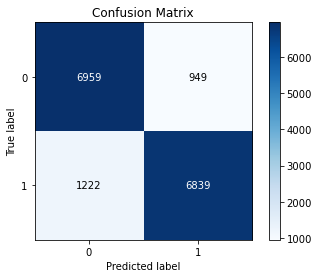

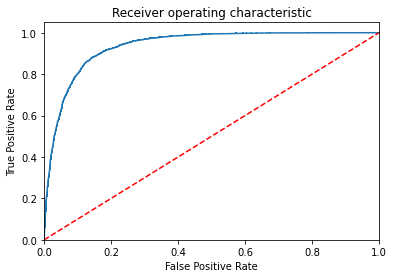

In [25]:
xgb_tuned = XGBClassifier(n_estimators=600,learning_rate=0.1,gamma=.5,max_depth=6, objective='binary:logistic',
                          min_child_weight =1,
                   use_label_encoder=False)

xgb_tuned.fit(X_train,y_train)

xgb_tuned_predict=xgb_tuned.predict(X_test)
xgb_tuned_proba=xgb_tuned.predict_proba(X_test)
print(classification_report(y_test,xgb_tuned_predict))

skplt.metrics.plot_confusion_matrix(y_test,xgb_tuned_predict)

fpr, tpr, thresholds = roc_curve(y_test, xgb_tuned_proba[:,1])
xgb_tuned_score=metrics.roc_auc_score(y_test, xgb_tuned_proba[:,1])
print(xgb_tuned_score)
plt.figure()
plt.plot(fpr, tpr, marker=',')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

## USING RANDOM SEARCH CV

In [113]:
from sklearn.model_selection import RandomizedSearchCV

In [132]:
params = {'n_estimators':[300,450,600,650],
    'gamma': [0.25,0.5, 1, 1.5, 2, 5],
        'max_depth': [4, 5,6,7],
          'learning_rate':[0.1,0.01,0.02],
        'min_child_weight': [1, 5, 10],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        }

xgb_hyp = XGBClassifier(objective='binary:logistic')

xgb_random_search = RandomizedSearchCV(xgb_hyp, param_distributions=params, n_iter=5, scoring='roc_auc', 
                                       n_jobs=4, cv=10, verbose=3, random_state=110)

#### Tuning1

In [125]:
xgb_random_search.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


C:\Users\Patra\anaconda3\lib\site-packages\xgboost\sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[19:30:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=10,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=600...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                   

In [126]:
xgb_random_search.best_params_

{'subsample': 0.6,
 'n_estimators': 650,
 'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 0.1,
 'gamma': 1.5,
 'colsample_bytree': 1.0}

#### Tuning2

In [54]:
params = {'n_estimators':[300,450,600,650,700,750],
    'gamma': [0.25,0.5, 1, 1.5, 2],
        'max_depth': [4, 5,6,7],
          'learning_rate':[0.1,0.01,0.02],
            'subsample':[0.4,0.6,0.8],'colsample_bytree':[0.4,0.6,0.8,1] }

xgb_hyp = XGBClassifier(objective='binary:logistic',use_label_encoder=False)

xgb_random_search = RandomizedSearchCV(xgb_hyp, param_distributions=params,scoring='roc_auc', 
                                       n_jobs=4, cv=5, verbose=3, random_state=110)
xgb_random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[21:13:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=100,...
                                           subsample=None, tree_method=None,
                                           use_label_encoder=False,
                                    

In [55]:
xgb_random_search.best_params_

{'subsample': 0.8,
 'n_estimators': 700,
 'max_depth': 6,
 'learning_rate': 0.1,
 'gamma': 1.5,
 'colsample_bytree': 1}

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[22:46:33] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.83      0.87      0.85      7908
           1       0.86      0.82      0.84      8061

    accuracy                           0.84     15969
   macro avg       0.85      0.84      0.84     15969
weighted avg       0.85      0.84      0.84     15969

0.9232846181025974


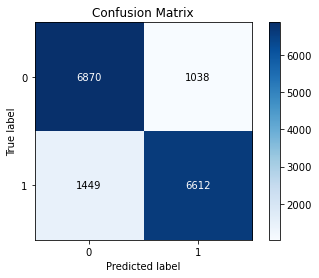

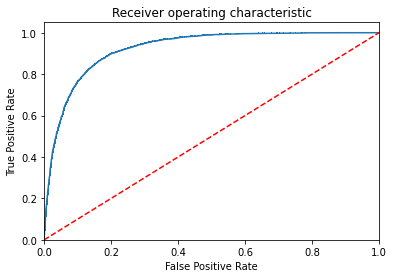

In [68]:
xgb_tuned = XGBClassifier(n_estimators=700,learning_rate=0.1,gamma=1.5,max_depth=5, objective='binary:logistic',
                          min_child_weight =1,colsample_bytree=1,subsample=0.8,
                   use_label_encoder=False)

xgb_tuned.fit(X_train,y_train)

xgb_tuned_predict=xgb_tuned.predict(X_test)
xgb_tuned_proba=xgb_tuned.predict_proba(X_test)
print(classification_report(y_test,xgb_tuned_predict))

skplt.metrics.plot_confusion_matrix(y_test,xgb_tuned_predict)

fpr, tpr, thresholds = roc_curve(y_test, xgb_tuned_proba[:,1])
xgb_tuned_score=metrics.roc_auc_score(y_test, xgb_tuned_proba[:,1])
print(xgb_tuned_score)
plt.figure()
plt.plot(fpr, tpr, marker=',')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

#### MODEL USING BEST FEATURES

In [44]:
xgb_x = XGBClassifier(
                   use_label_encoder=False)

xgb_x.fit(X_train,y_train)

[19:07:47] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [30]:
X_train.columns

Index(['age', 'balance', 'day', 'campaign', 'pdays', 'previous',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'education_secondary',
       'education_tertiary', 'education_unknown', 'default_yes', 'housing_yes',
       'loan_yes', 'contact_telephone', 'contact_unknown', 'month_aug',
       'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun',
       'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [45]:
ranks=pd.DataFrame({'Inportance':xgb_x.feature_importances_,'Columns':X_train.columns}).sort_values(
    by='Inportance',ascending=False).reset_index().drop('index',axis=1)
ranks

,Inportance,Columns
0,0.354520,poutcome_success
1,0.102720,contact_unknown
2,0.040805,month_mar
3,0.034954,month_oct
4,0.030396,month_jun
5,0.029530,housing_yes
6,0.028888,month_jul
7,0.028214,month_nov
8,0.028094,month_aug
9,0.025783,month_sep


In [50]:
cols=ranks[:25]['Columns']

best_X_train, best_X_test, best_y_train, best_y_test = train_test_split(X[cols], y, test_size=0.2, random_state=42)

In [51]:
xgb_tuned_best = XGBClassifier(use_label_encoder=False)

xgb_tuned_best.fit(best_X_train,best_y_train)

xgb_tuned_predict_best=xgb_tuned_best.predict(best_X_test)
print(classification_report(best_y_test,xgb_tuned_predict_best))

[19:42:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.76      0.85      0.80      7908
           1       0.83      0.74      0.78      8061

    accuracy                           0.79     15969
   macro avg       0.80      0.79      0.79     15969
weighted avg       0.80      0.79      0.79     15969



## -------------------------------------------------------------------------------------------------------------------------------------